In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

In [2]:
housing = fetch_california_housing()
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [3]:
housing.target.shape

(20640,)

In [4]:
print(housing.data.shape)

(20640, 8)


In [5]:
house_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
house_df['target'] = housing.target
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
house_df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [7]:
house_df.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
target,float64


In [8]:
X = house_df.drop('target', axis=1)
Y = house_df['target']

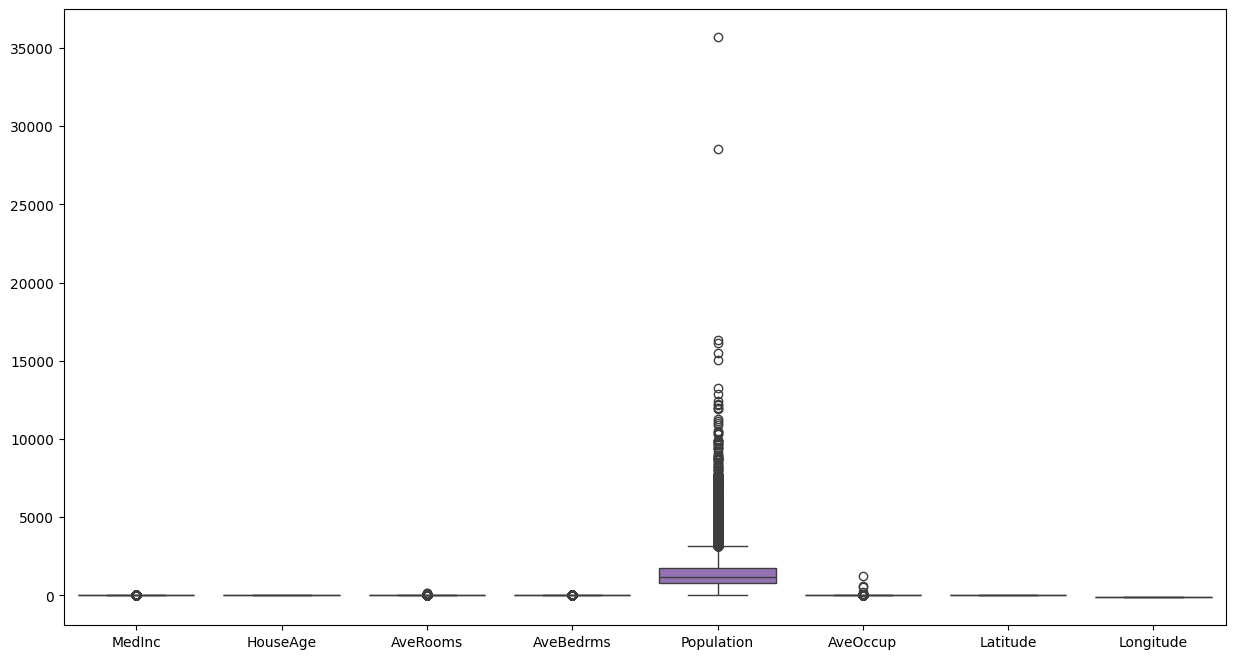

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=X, ax=ax)
plt.savefig("boxplot.jpg")

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [12]:
train_data = X_train.join(Y_train)

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

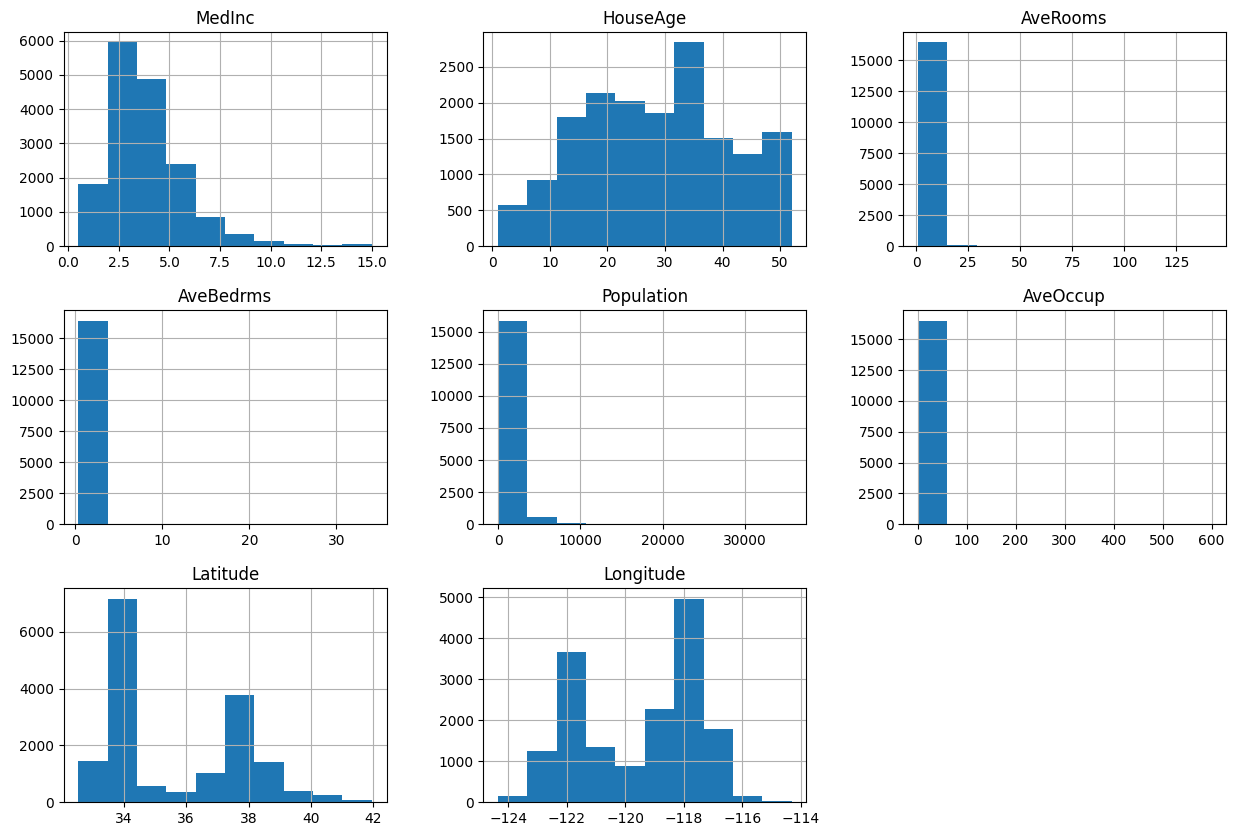

In [35]:
X_train.hist(figsize=(15,10))

<Axes: >

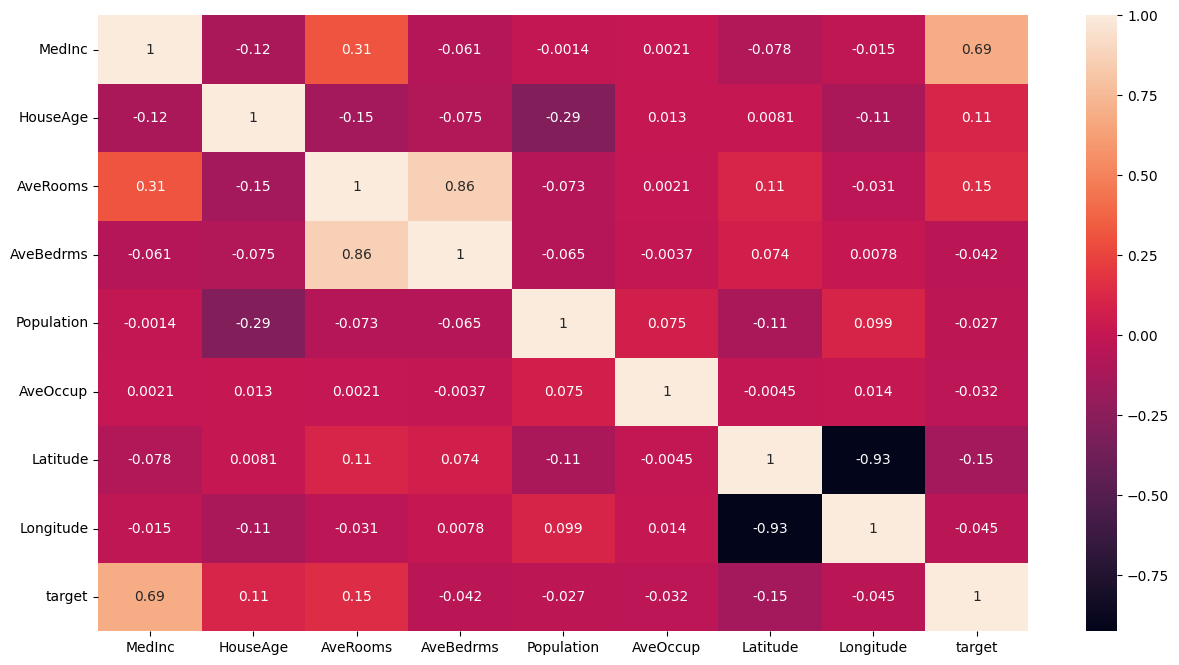

In [14]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True)

In [15]:
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
print(X_scaled_data)

[[-0.70962463 -0.60284716  0.17960722 ... -0.14595515 -0.85071881
   1.52346202]
 [-0.65125171  1.37738127  0.30732149 ... -0.12797078  1.33721733
  -1.6764423 ]
 [ 0.68297151  0.18924421 -0.15439894 ... -0.10042372  0.93048561
  -1.45214994]
 ...
 [ 0.88315258 -1.79098421 -0.20270184 ...  0.10752716  0.78555822
  -1.10325072]
 [-0.87633644  0.50608076 -1.03344032 ...  0.20534167 -0.77591757
   0.67115105]
 [-0.62761702 -0.99889284 -0.56950308 ... -0.0885504   0.77620806
  -1.14810919]]


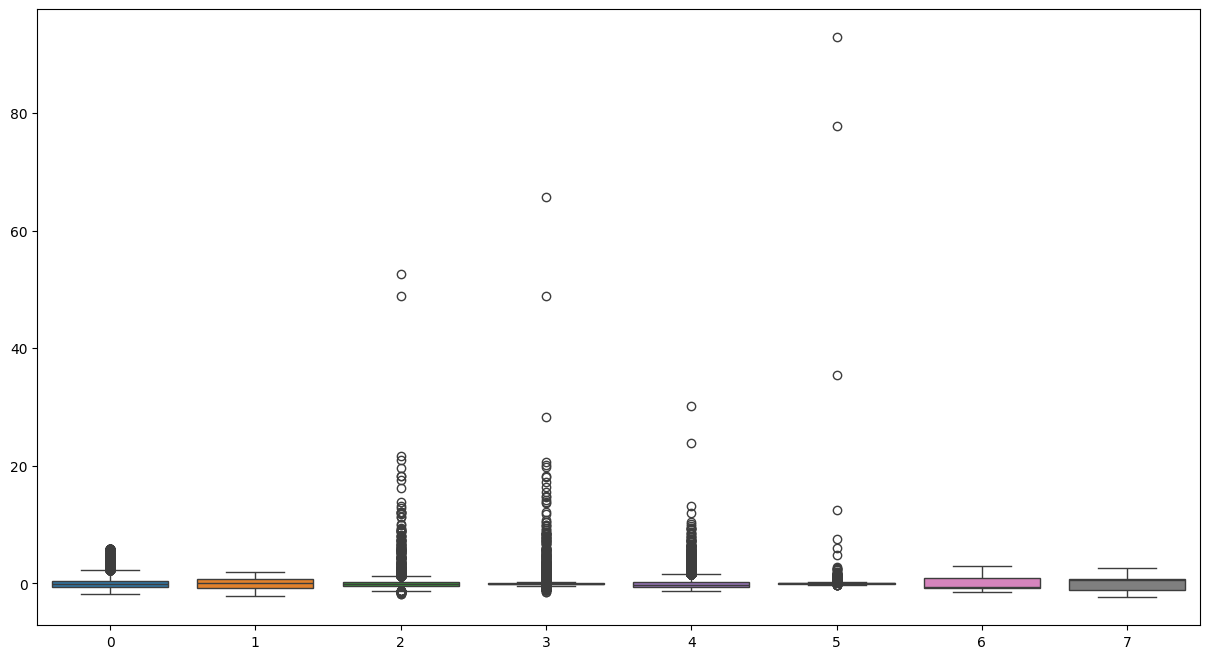

In [17]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=X_scaled_data, ax=ax)
plt.savefig("scaledData.jpg")

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_scaled_data, Y_train)

LinearRegression()

In [20]:
model.intercept_

2.0645604790455474

In [21]:
predict = model.predict(X_test_scaled)
predict

array([3.00511808, 2.56692165, 2.33800105, ..., 2.35698941, 1.18243937,
       3.7351984 ])

In [22]:
model.score(X_scaled_data, Y_train)

0.6074049305021048

In [23]:
model.score(X_test_scaled, Y_test)

0.6009790143129107

In [24]:
from sklearn import metrics

In [25]:
score_1 = metrics.r2_score(Y_test, predict)
score_1

0.6009790143129107

In [26]:
#mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, predict)

In [27]:
score_2

0.5366527228153437